## Problema 2

Este bloque de código realiza simulaciones para calcular y graficar la cobertura de un intervalo de confianza para diferentes tamaños de muestra. La cobertura es la proporción de veces que el intervalo de confianza contiene el parámetro real.

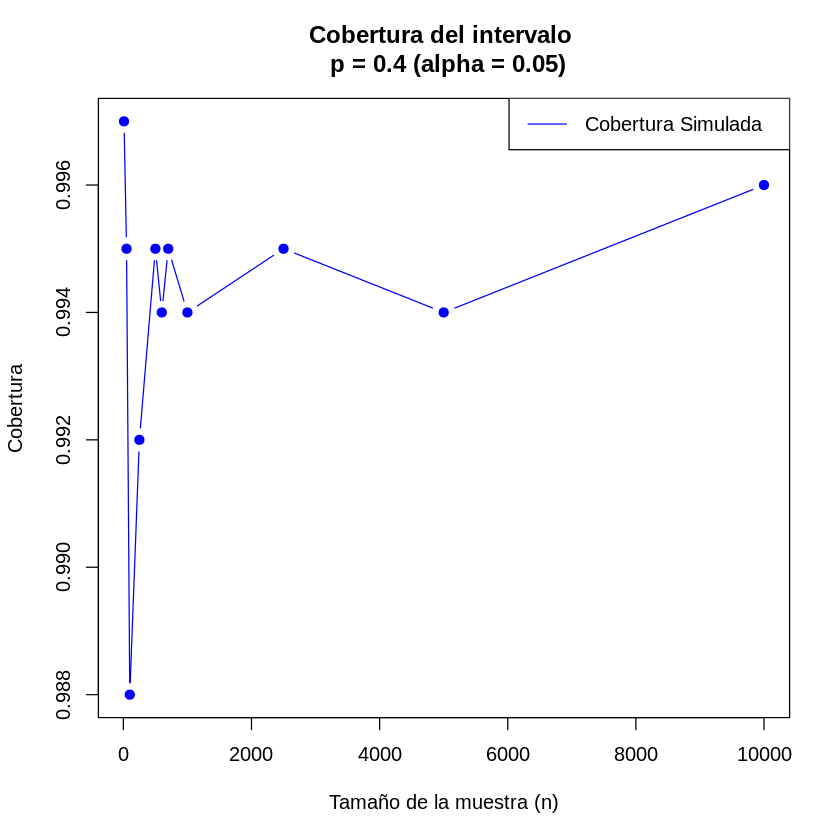

In [1]:
alpha <- 0.05
p <- 0.4
n_values <- c(10, 50, 100, 250, 500,600,700, 1000, 2500, 5000, 10000)

num_simulations <- 1000

cobertura <- numeric(length(n_values))

for (i in seq_along(n_values)) #Inicio de la simulación
{
  n <- n_values[i]
  epsilon_n <- sqrt((1 / (2 * n)) * log(2 / alpha))

  contains_p <- numeric(num_simulations)
  for (j in 1:num_simulations) {
    x <- rbinom(n, 1, p)
    p_estimada <- mean(x)
    ci_low <- max(0, p_estimada - epsilon_n)
    ci_high <- min(1, p_estimada + epsilon_n)
    contains_p[j] <- (p >= ci_low & p <= ci_high)
  }

  cobertura[i] <- mean(contains_p)
}

# Plot results
plot(n_values, cobertura, type = "b", pch = 19, col = "blue", xlab = "Tamaño de la muestra (n)", ylab = "Cobertura",
     main = paste0("Cobertura del intervalo \n p = ", p, " (alpha = ", alpha, ")"))

legend("topright", legend = c("Cobertura Simulada"), col = c("blue"), lty = c(1))





## Código de interval_length.R

Este bloque de código calcula y grafica la longitud del intervalo de confianza para diferentes tamaños de muestra. También identifica el tamaño mínimo de muestra necesario para que la longitud del intervalo sea inferior a un valor objetivo.

[1] 5000

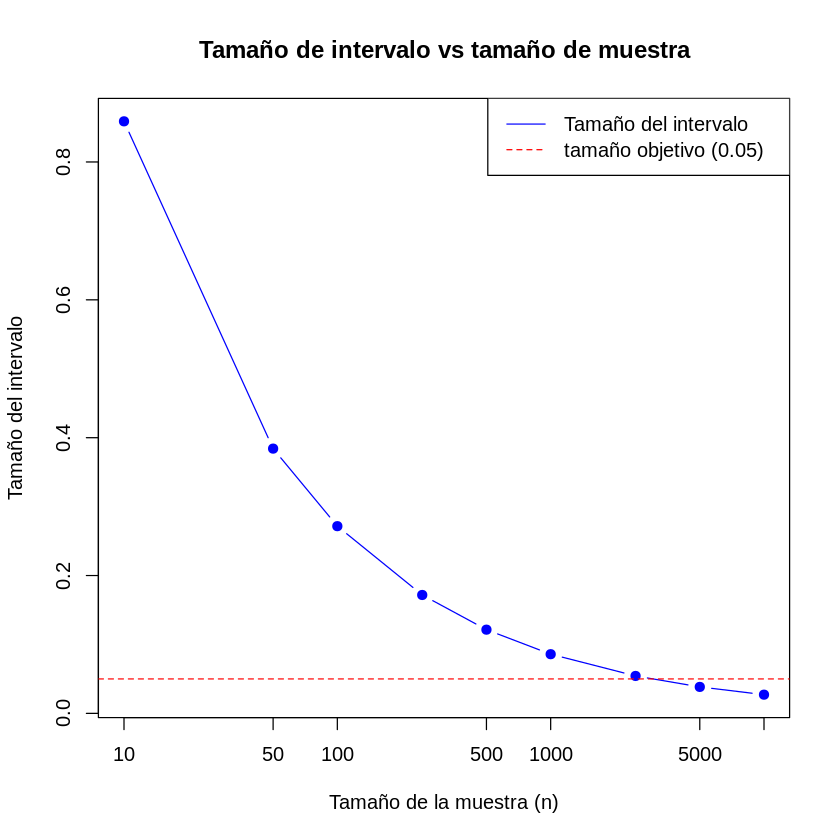

In [2]:
alpha <- 0.05
p <- 0.4
n_values <- c(10, 50, 100, 250, 500, 1000, 2500, 5000, 10000)

interval_lengths <- numeric(length(n_values))

for (i in seq_along(n_values))
{
  n <- n_values[i]
  epsilon_n <- sqrt((1 / (2 * n)) * log(2 / alpha))
  interval_length <- 2 * epsilon_n
  interval_lengths[i] <- interval_length
}

plot(n_values, interval_lengths, type = "b", pch = 19, col = "blue", xlab = "Tamaño de la muestra (n)", ylab = "Tamaño del intervalo",
     main = "Tamaño de intervalo vs tamaño de muestra", log = "x")
abline(h = 0.05, col = "red", lty = 2)
legend("topright", legend = c("Tamaño del intervalo", "tamaño objetivo (0.05)"), col = c("blue", "red"), lty = c(1, 2))

min_n <- min(n_values[interval_lengths < 0.05])
min_n
